## Load Dependencies

In [1]:
import matplotlib.pyplot as plt # for plotting
from tmaze_toolkit.data.extraction import selectDoorCoords, extractDoorTraces, initial_coords
from tmaze_toolkit.processing.signal import bandpass_filter, process_door_traces
from tmaze_toolkit.visualization.plotDoorTraces import plotDoorTraces
from tmaze_toolkit.data.openFunctions import openDoorTracesPkl
from tmaze_toolkit.processing.extractTrialTimes import extract_floor_traces, extract_trial_times, verify_correct_trial_times
from tmaze_toolkit.data.jsonProcessing import load_json_files, add_trajectories, save_outDict
from tmaze_toolkit.visualization.plotTrajectory import plot_trajectory, plot_trajectory_all_trials, plot_multiple_bodyparts
from tmaze_toolkit.processing.normalize import normalize_trajectory
from tmaze_toolkit.data.analysisTools import find_percent_correct, find_trial_length, save_trial_duration, load_trial_duration

In [2]:
pkl_file = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-25T13_51_43_doorTraces.pkl"
dat = openDoorTracesPkl(pkl_file)
dat = process_door_traces(dat)
events = extract_trial_times(dat, use_floor_traces=False,pad_frames=120)

Floor Starts: 102
Floor Ends: 102
Trial Starts: 100
Trial Ends: 100
Trial 0 likely has a missed detection in the doors 1 and 2
Trial 1 likely has a missed detection in the doors 1 and 2
Trial 2 likely has a missed detection in the doors 1 and 2
Trial 3 likely has a missed detection in the doors 1 and 2
Trial 4 likely has a missed detection in the doors 1 and 2
Trial 5 likely has a missed detection in the doors 1 and 2
Trial 6 likely has a missed detection in the doors 1 and 2
Trial 7 likely has a missed detection in the doors 1 and 2
Trial 8 likely has a missed detection in the doors 1 and 2
Trial 9 likely has a missed detection in the doors 1 and 2
Trial 10 likely has a missed detection in the doors 1 and 2
Trial 11 likely has a missed detection in the doors 1 and 2
Trial 12 likely has a missed detection in the doors 1 and 2
Trial 13 likely has a missed detection in the doors 1 and 2
Trial 14 likely has a missed detection in the doors 1 and 2
Trial 15 likely has a missed detection in 

In [3]:
print(len(events))

100


In [4]:
jsonFileLocation = r"N:\TMAZE\TMAZE_DATA\data_ATO1_20250325*"
outDict = load_json_files(jsonFileLocation)
print(len(outDict))
verify_correct_trial_times(events, jsonFileLocation)

Found 2 json files
Animal ID: ATO1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250325_133924.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250325_142304.json
101
Found 2 json files
Animal ID: ATO1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250325_133924.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250325_142304.json
Trial times verified successfully


True

In [5]:
print(len(outDict))

101


In [6]:
outDict[1]

{'MazeTexture': 'CNO',
 'rewardBefLick': False,
 'lickUntilCorrect': False,
 'decision': 'incorrect',
 'floorID': 'F,1',
 'time_for_trial': 1,
 'valve': 1,
 'lick': 'right(V2)',
 'trial_number': 2,
 'trial_time': [2025, 3, 25, 13, 52, 45, 1, 84, 1],
 'right_probability': 0.5,
 'rewardAmount(ms)': 5,
 'BiasCorrection(T/F)': False,
 'coneHeight_1(floor1)': '0.75',
 'coneHeight_2(floor2)': '0.25',
 'Injection': '2'}

In [5]:
import pandas as pd
def find_trial_length(events):
    trial_lengths = []
    trial_numbers = []
    n = 1
    for i in range(len(events)):
        trial_numbers.append(n)
        trial_lengths.append(events.iloc[i]['trial_end_frame'] - events.iloc[i]['trial_start_frame'])
        n += 1

    trial_duration = pd.DataFrame({'trial_number': trial_numbers, 'trial_duration': trial_lengths})
    return trial_duration


In [ ]:

trial_duration = find_trial_length(events)
print(trial_duration)

In [11]:
def average_trial(trial_duration):
    counter = 0
    num = len(trial_duration)
    for x in range(num):
        counter += trial_duration.iloc[x]['trial_duration']

    return counter/num

In [ ]:
print(f"Average_Duration: {average_trial(trial_duration)}")

In [9]:
outDict = load_json_files(jsonFileLocation)
outDict[67]['lick']
print(len(events))


Found 2 json files
Animal ID: ATO1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250325_133924.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250325_142304.json
100


In [ ]:
outDict[99]

In [8]:
from tmaze_toolkit.data.deeplabcutProcessing import load_deeplabcut_files
dlc_file = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-25T13_51_43DLC_resnet50_Intermidiate textured DLC model Sep10shuffle1_100000.h5"
dlc_dict = load_deeplabcut_files(dlc_file)

In [10]:
outDict = add_trajectories(outDict, dlc_dict, events)


In [ ]:
print(outDict[3]['lick'])
print(outDict[3])


In [44]:
# Percent of correct trials





In [11]:
percent_correct = find_percent_correct(outDict)
print(percent_correct)


0.8217821782178217


In [9]:
save_outDict(outDict, jsonFileLocation)

In [12]:
videoFile = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-25T13_51_43.mp4"

In [ ]:
normalize_trajectory(outDict, videoFile)



In [ ]:
outDict[0]['trajectory'].droplevel(0, axis=1)
outDict[0]['trajectoryOptomized'].droplevel(0, axis=1)

In [ ]:
from tmaze_toolkit.visualization.plotTrajectory import plot_normalized_trajectory
plot_normalized_trajectory(outDict, videoFile, confidence_threshold=0.1)


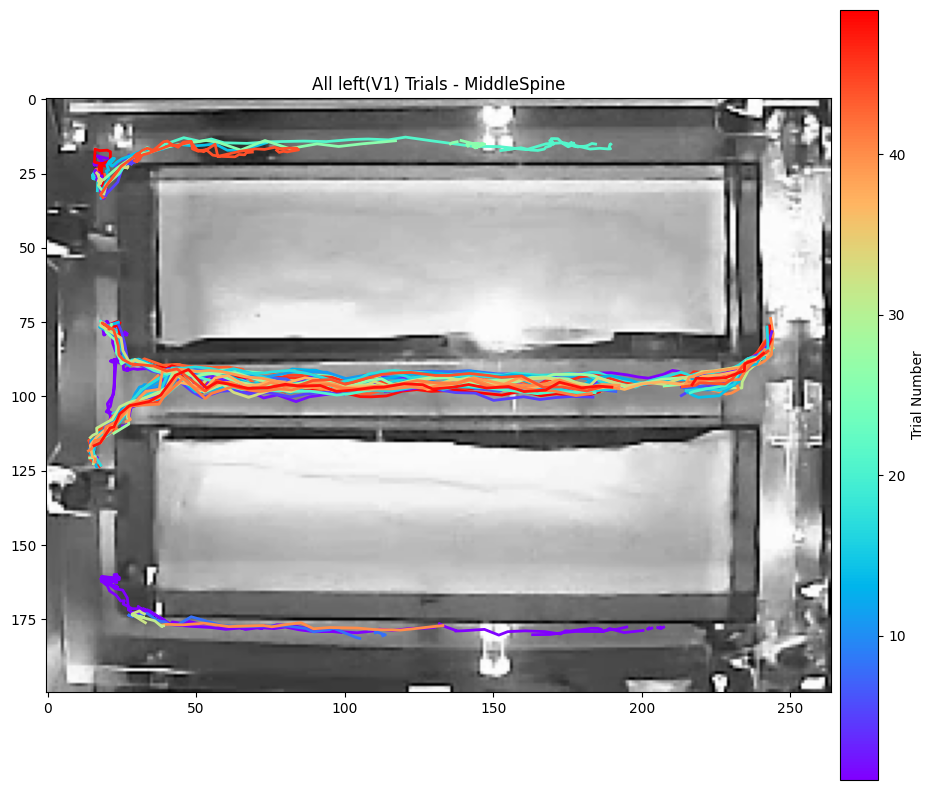

In [13]:
plot_trajectory_all_trials(outDict, videoFile, bodyPart='MiddleSpine', confidence_threshold=0.4)


In [ ]:
plot_multiple_bodyparts(outDict, videoFile, bodyParts=['UpperSpine', 'TailBase'], confidence_threshold=0.12)

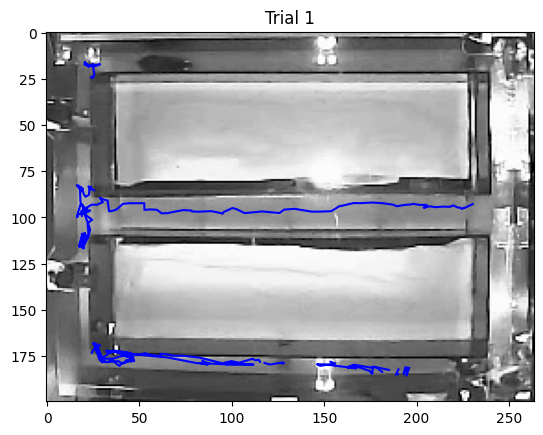

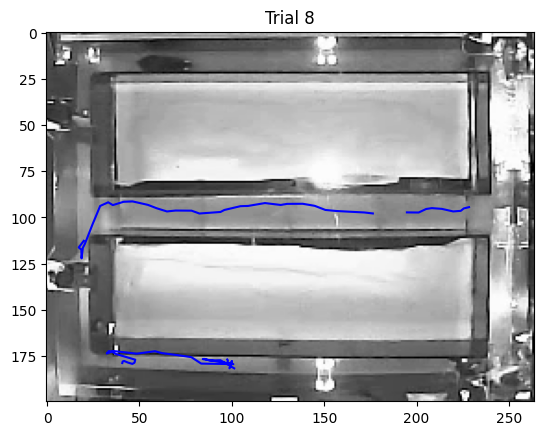

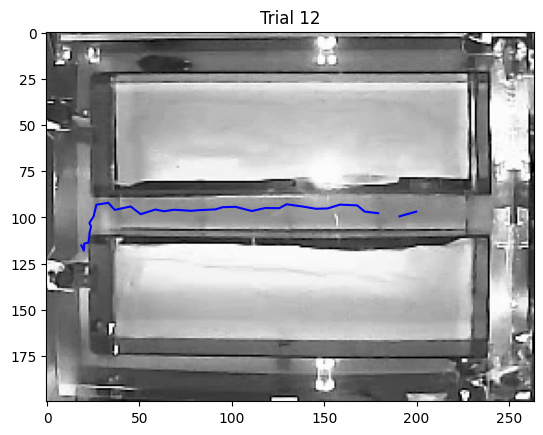

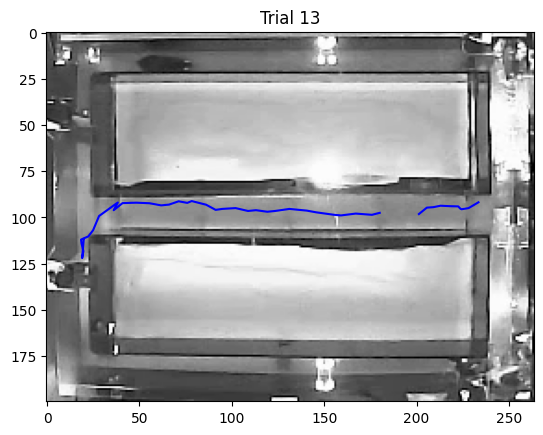

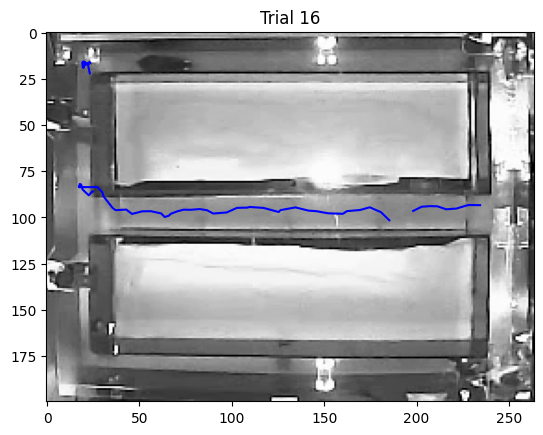

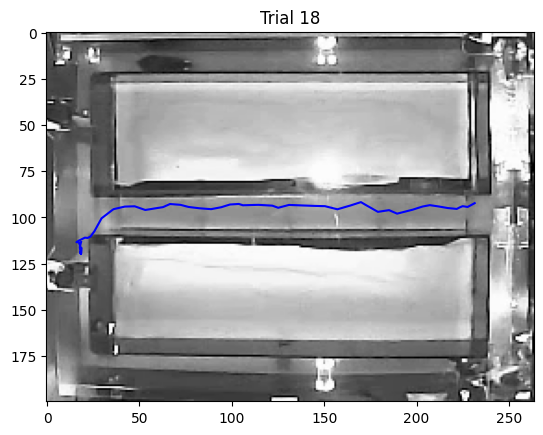

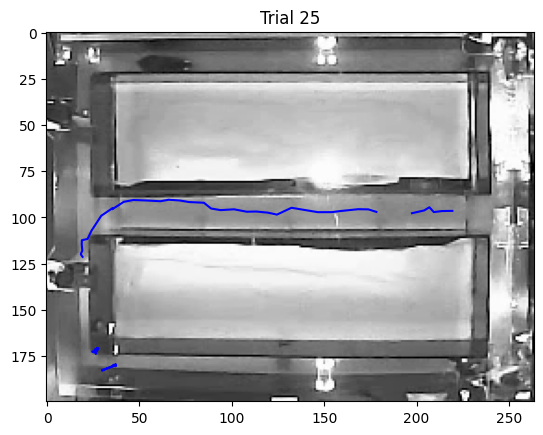

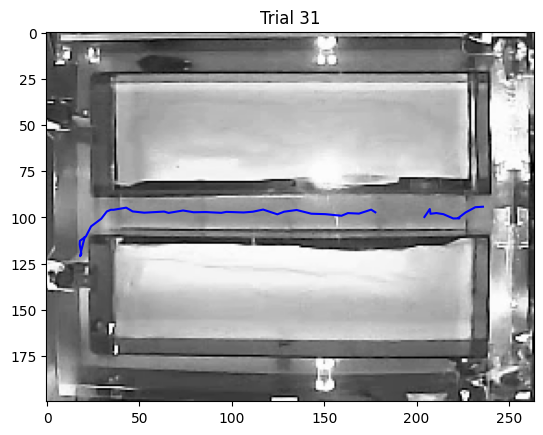

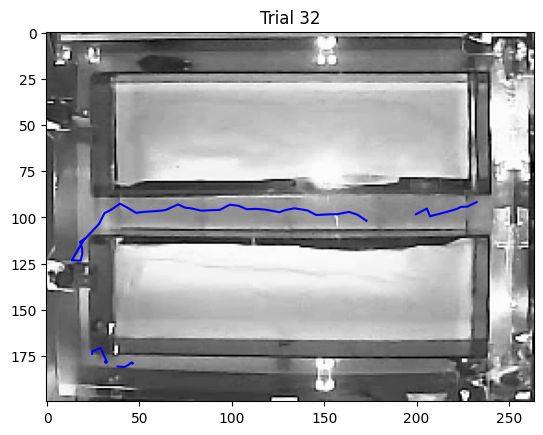

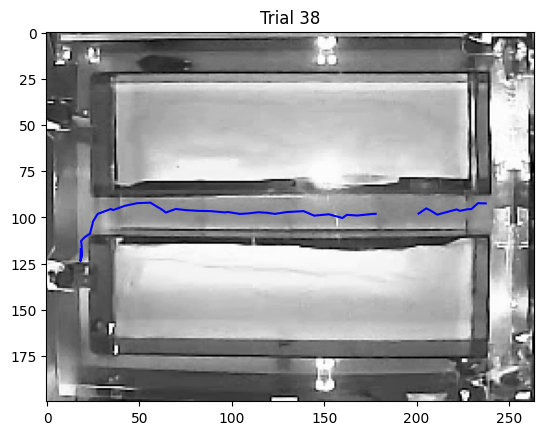

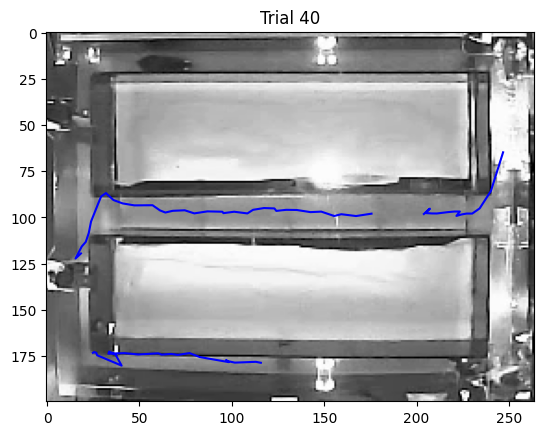

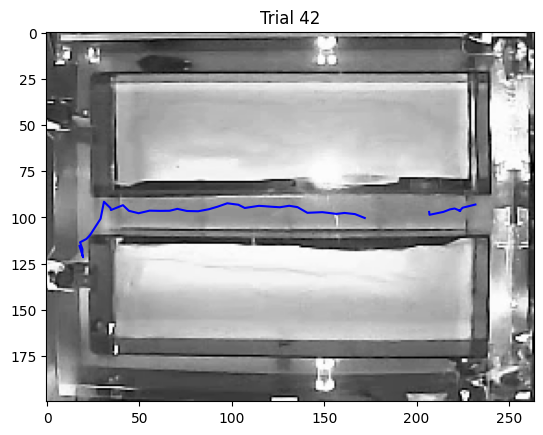

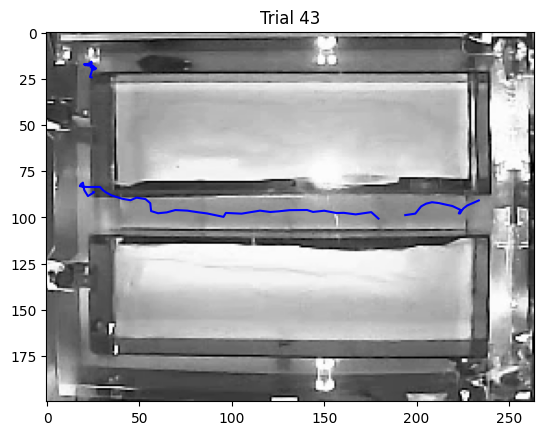

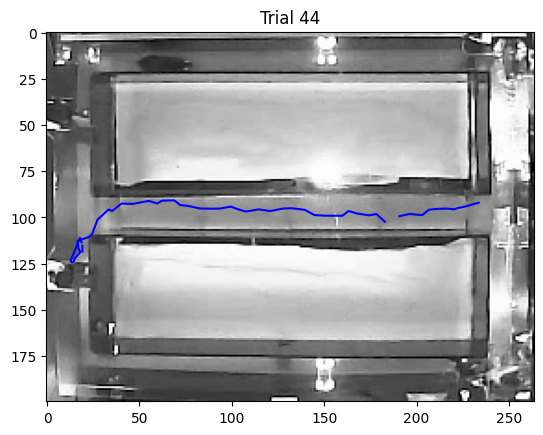

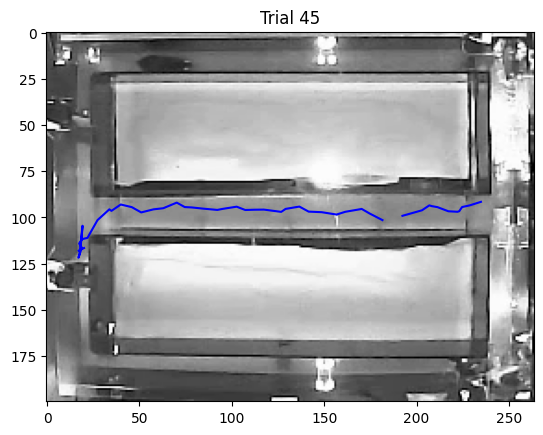

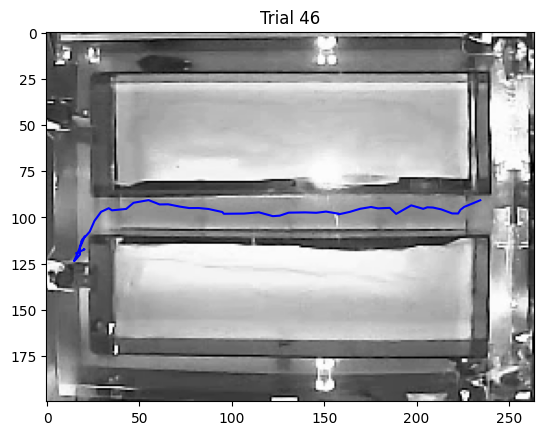

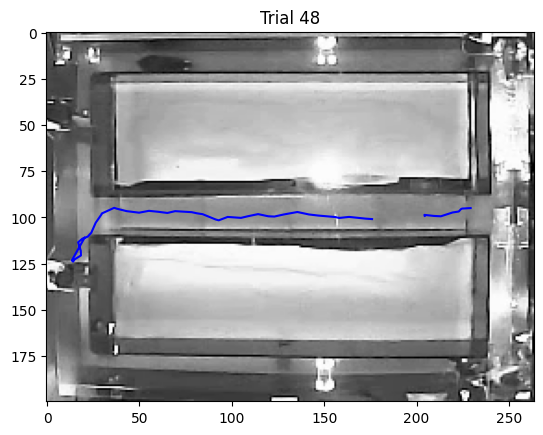

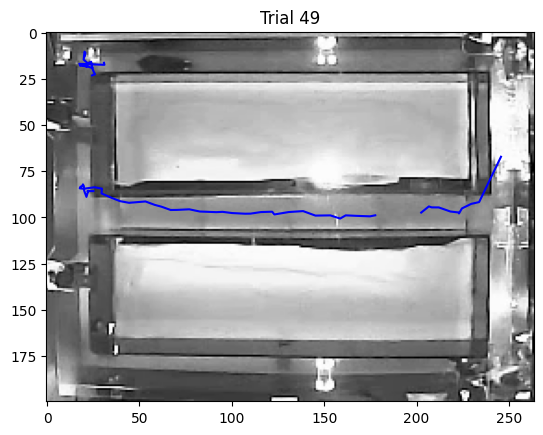

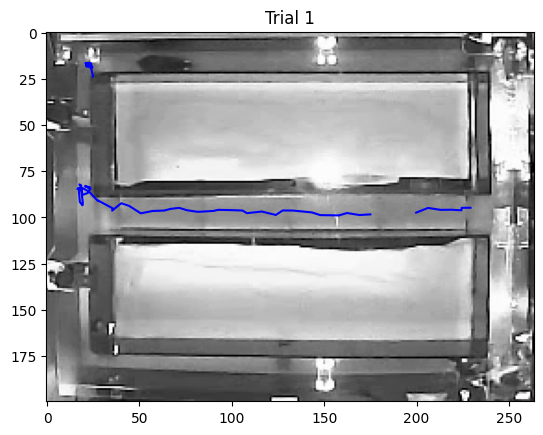

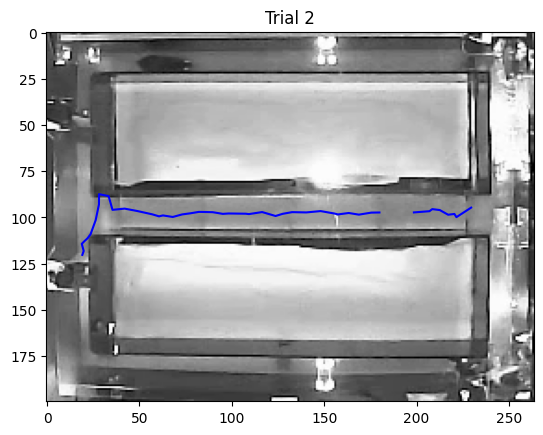

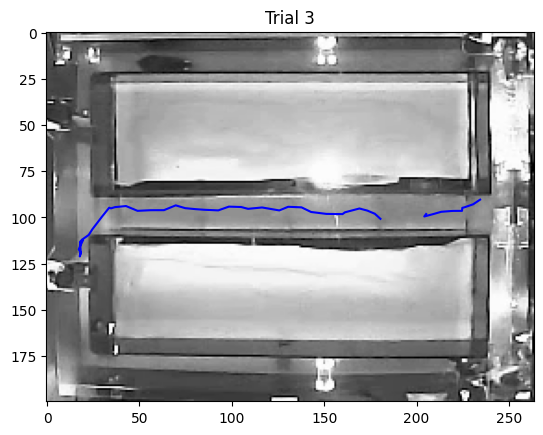

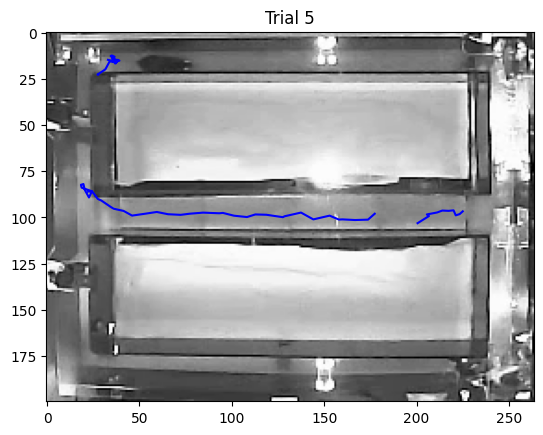

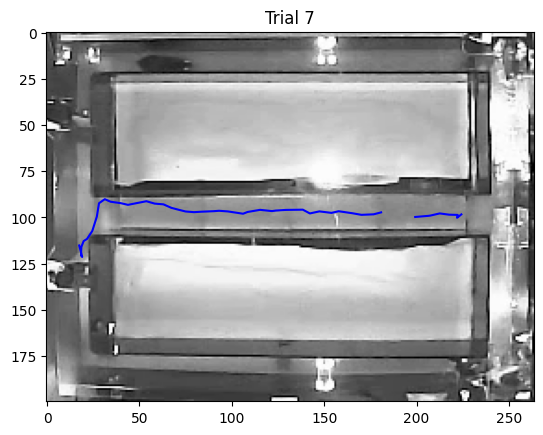

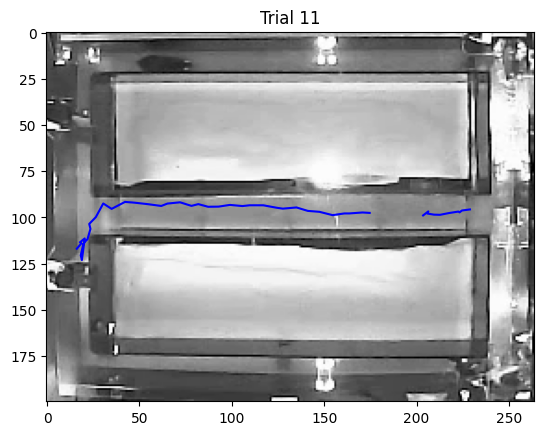

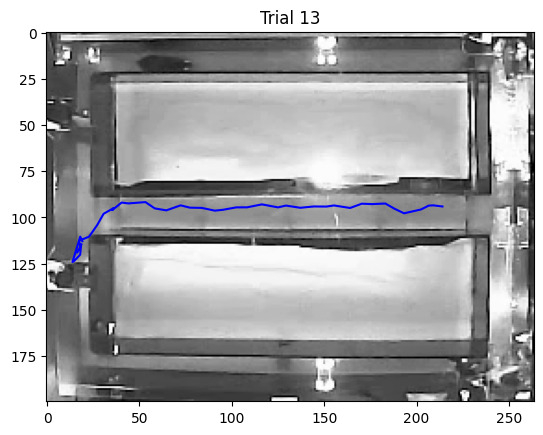

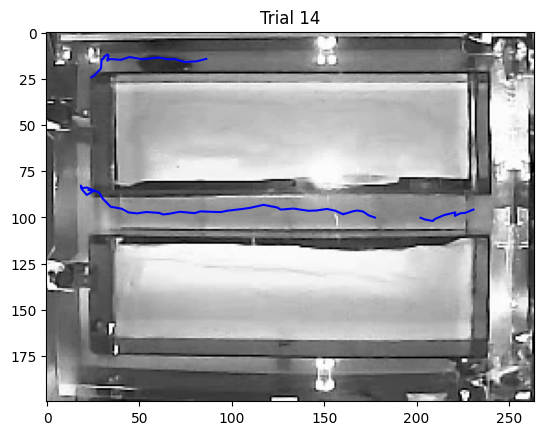

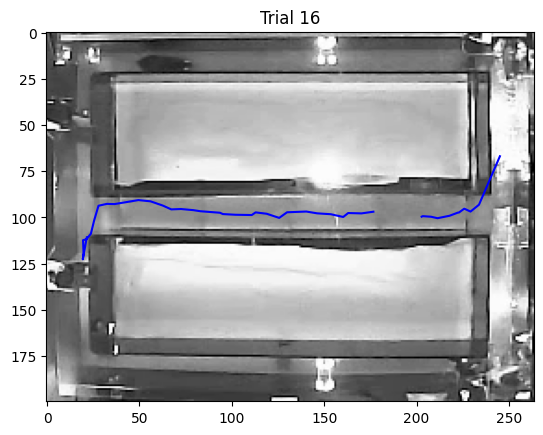

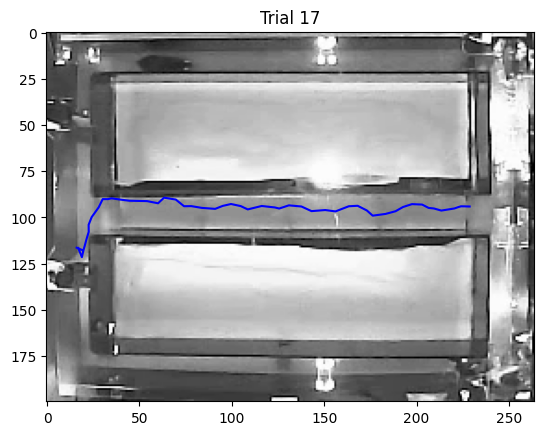

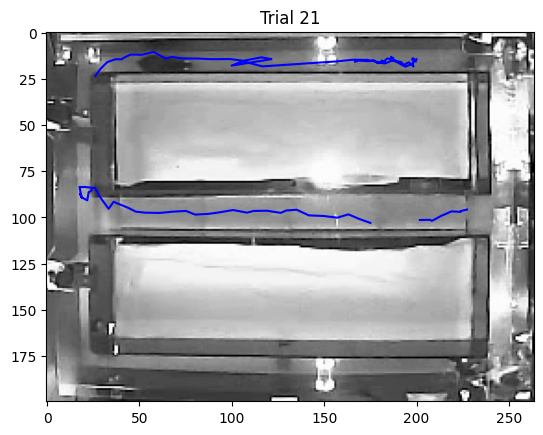

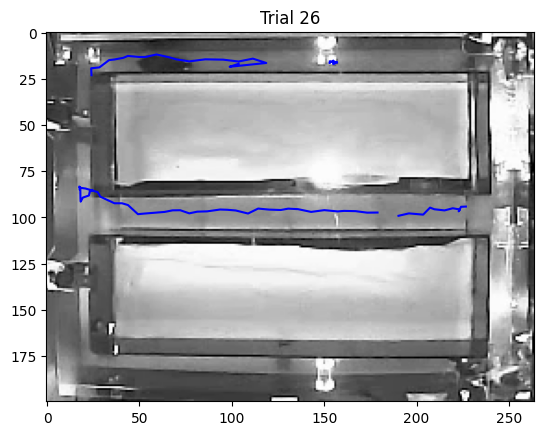

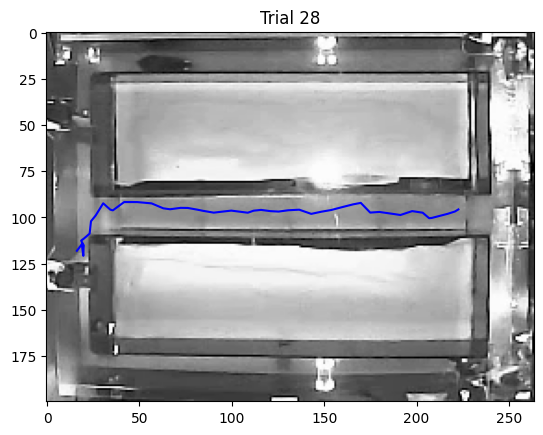

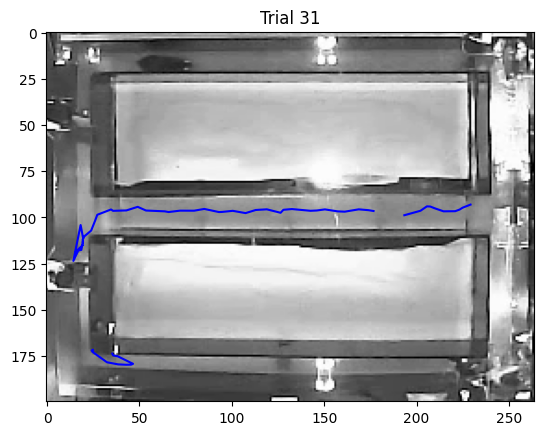

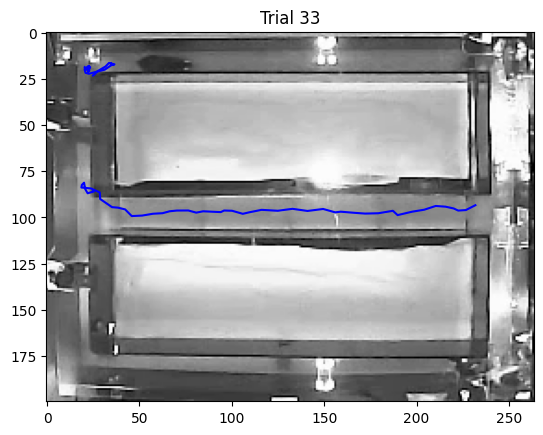

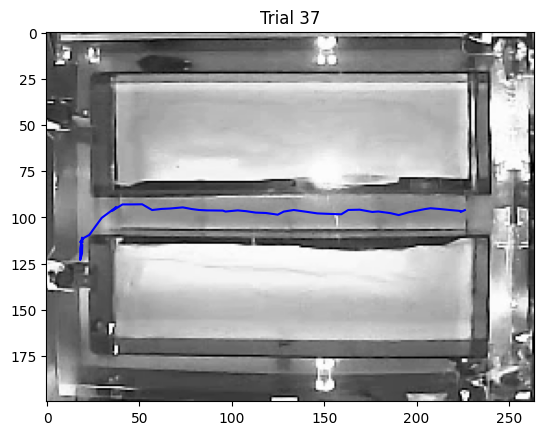

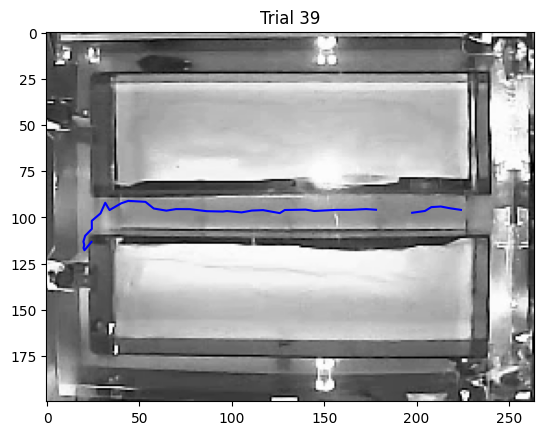

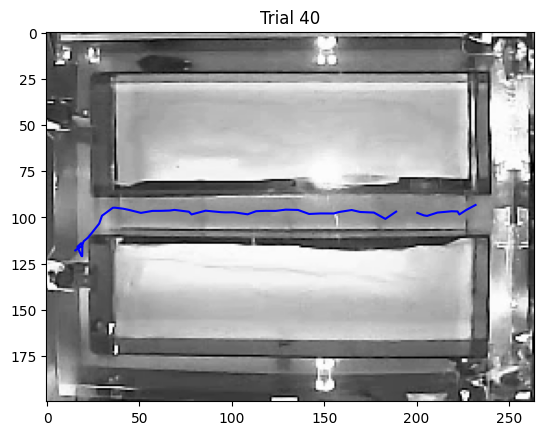

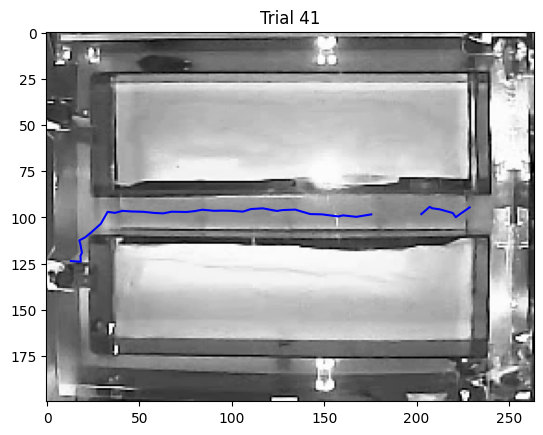

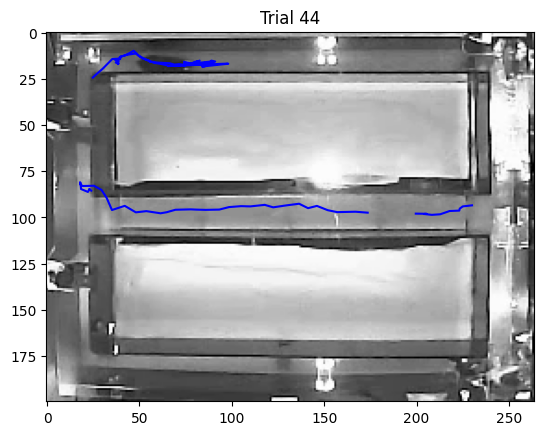

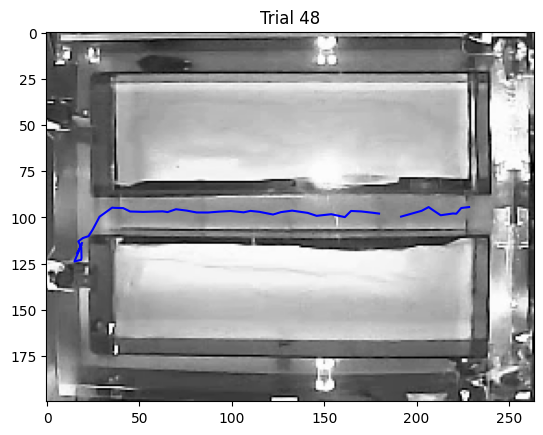

In [14]:
plot_trajectory(outDict, videoFile, bodyPart='TailBase', confidence_threshold=0.4)